In [1]:
#!pip3 install statsmodels

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import kaggle
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

/Users/sanjayk/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/

In [2]:
# Download the data in local directory
kaggle.api.authenticate()
kaggle.api.dataset_download_files("mathchi/diabetes-data-set", unzip=True) 

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
sample1  = np.random.randint(0,df.shape[0],100) 
ds1 =  df.iloc[sample1]
sample2  = np.random.randint(0,df.shape[0],100)
ds2 =  df.iloc[sample2]
sample3  = np.random.randint(0,df.shape[0],100) 
ds3 =  df.iloc[sample3]
sample4  = np.random.randint(0,df.shape[0],100)
ds4 =  df.iloc[sample4]

print(f'Population Count  : {df.shape[0]}')
print(f'Sample1 Count  : {ds1.shape[0]} |  Mean : {ds1.Glucose.mean():0.3f} |  Standard Deviation : {ds1.Glucose.std():0.3f} ')
print(f'Sample2 Count  : {ds2.shape[0]} |  Mean : {ds2.Glucose.mean():0.3f} |  Standard Deviation : {ds2.Glucose.std():0.3f}')
print(f'Sample3 Count  : {ds3.shape[0]} |  Mean : {ds3.Glucose.mean():0.3f} |  Standard Deviation : {ds3.Glucose.std():0.3f}')
print(f'Sample4 Count  : {ds4.shape[0]} |  Mean : {ds4.Glucose.mean():0.3f} |  Standard Deviation : {ds4.Glucose.std():0.3f}')

Population Count  : 768
Sample1 Count  : 100 |  Mean : 122.850 |  Standard Deviation : 32.193 
Sample2 Count  : 100 |  Mean : 117.450 |  Standard Deviation : 31.804
Sample3 Count  : 100 |  Mean : 121.300 |  Standard Deviation : 29.957
Sample4 Count  : 100 |  Mean : 121.850 |  Standard Deviation : 33.675


<Axes: xlabel='Glucose', ylabel='BloodPressure'>

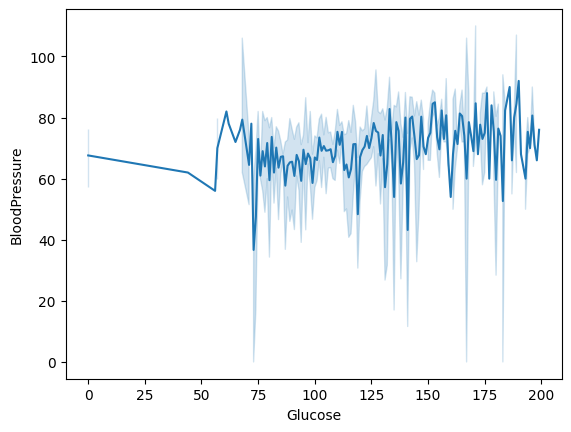

In [5]:
sns.lineplot(data=df, x = 'Glucose' , y = 'BloodPressure')
#sns.pairplot(data=df)

#### Significant Value : alpha
    - 1 % level of significance : 0.01
    - 5 % level of significance : 0.05
    - 10 % level of significance : 0.1

Hypothesis Testing : 
    - Null Hypothesis
    - Alternative Hypothesis

"Are the Glucose and Blood Pressure bound to each other?" True/False 
"Lower Education people are the among less diabetic people?" True/False

#### Null hypothesis: H0
-     Everyone with high glucose levels will also have high blood pressure
-     There is no significance found from the population s = 0.0005 to 0.01

#### Alternate hypothesis: H1
-    "Everyone with high glucose levels will not have high blood pressure"

In [6]:
from sklearn.feature_selection import chi2
from scipy.stats import chisquare, chi2_contingency 

## Stastical test

# setting significance to 0.05 #threshould
alpha = 0.05 

def check_ChiSquareAnalysis(var1, var2, significance_level=alpha):
    tab_class = pd.crosstab(df[var1], df[var2], margins=True)
    tab_values = np.array([tab_class.iloc[0].values, tab_class.iloc[1].values])
    
    stat, p, dof, expected_value = chi2_contingency(tab_values)
    
    print(f"p value: {p}") 
    
    if p > significance_level: 
        print('Accept Null Hypothesis')
        #print('Reject Alternate Hypothesis')
    else:
        #print('Reject NULL HYPOTHESIS') 
        print('Accept Alternative hypothesis')
   

In [7]:
tab_class = pd.crosstab(df['Glucose'], df['Outcome'],margins=True)
tab_values = np.array([tab_class.iloc[0].values, tab_class.iloc[1].values])
chi2_contingency(tab_values)

Chi2ContingencyResult(statistic=0.6000000000000001, pvalue=0.7408182206817179, dof=2, expected_freq=array([[3.33333333, 1.66666667, 5.        ],
       [0.66666667, 0.33333333, 1.        ]]))

In [8]:
check_ChiSquareAnalysis('Glucose', 'Outcome')
check_ChiSquareAnalysis('BloodPressure', 'Outcome')

p value: 0.7408182206817179
Accept Null Hypothesis
p value: 0.6627028552221849
Accept Null Hypothesis


### When to perform one-tail test or two-tail test, Choose two-tailed or one-tailed ? 

#### Two-tail Test
   * Two-tailed tests are used when the alternative hypothesis is non-directional.
   * A non-directional hypothesis states that a population parameter (such as a mean or regression coefficient) does not equal a certain value (such as 0). Two-tailed tests are appropriate for most studies.
   * If you’re calculating a confidence interval, choose two-tailed.

https://www.jmp.com/en_in/statistics-knowledge-portal/t-test/two-sample-t-test.html

#### One-tail Test

   * One-tailed tests are used when the alternative hypothesis is directional.
   * A directional hypothesis states that a population parameter is greater than or less than a certain value.
   * Your alternative hypothesis is directional if it includes words such as “greater than,” “less than,” “increases,” “decreases,” or the “<” or “>” sign. If it doesn’t include these (or similar), it is probably non-directional.


https://www.jmp.com/en_in/statistics-knowledge-portal/t-test/one-sample-t-test.html

### One-Sample Test / One-tail Test

In [9]:
#energy bar 20gm bar details
barList = [20.70, 27.46, 22.15, 19.85, 21.29, 24.75, 20.75, 22.91, 25.34, 20.33, 21.54, 21.08, 22.14, 19.56, 21.10, 18.04, 24.12, 19.95, 19.72, 18.28, 16.26, 17.46, 20.53, 22.12, 25.06, 22.44, 19.08, 19.88,21.39, 22.33, 25.79]

In [10]:
barArray = np.array(barList)

In [11]:
df = pd.Series(barList)
df.head()

0    20.70
1    27.46
2    22.15
3    19.85
4    21.29
dtype: float64

In [12]:
U95 = df.mean() + 1.96 * df.std()  / np.sqrt(df.count())
L95 = df.mean() - 1.96 * df.std()  / np.sqrt(df.count())
print(f'Mean           : {df.mean():0.4f}')
print(f'Standard Dev.  : {df.std():0.4f}')
print(f'Upper 95% Mean : {U95:0.4f}')
print(f'Lower 95% Mean : {L95:0.4f}')
print(f'N              : {df.count()}')

Mean           : 21.4000
Standard Dev.  : 2.5417
Upper 95% Mean : 22.2947
Lower 95% Mean : 20.5053
N              : 31


In [13]:
# Computation for One-Sample test
alpha = 0.05
mu = 20 # Comparing with constant value
xbar = df.mean()
std = df.std()
n = df.count()
dof = n -1 
one_t_test = (xbar - mu ) / (std / np.sqrt(n))
print(f'One-Sample Test Value : {one_t_test:0.4f}')
print(f'Degree of Freedom     : {dof}')

One-Sample Test Value : 3.0668
Degree of Freedom     : 30


In Statistics hypothesis testing, we need to judge whether it is a one-tailed or a two-tailed test so that we can find the critical values in tables such as Standard Normal z Distribution Table and
t Distribution Table. And then, by comparing the test statistic value with the critical value or
whether statistic value falls in the critical region, we conclude either to reject the null
hypothesis or to fail to reject the null hypothesis.

In [14]:
# T- tests : left-tail: alpha
# T- tests : right-tail: 1-alpha
# T- tests : two-tail: 1-alpha/2; we are using two tail test because we are checking the bar value to constant value 20.
critical_value = stats.t.ppf(q=1-alpha/2,df=dof)
print(f'Critical value is  : {critical_value:0.04f}')
if one_t_test > critical_value: 
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

Critical value is  : 2.0423
Reject Null Hypothesis


In [15]:
### Two-Sample Test / Two-tails Test

In [16]:
mList = [13.3, 6.0, 20.0, 8.0, 14.0, 19.0,	18.0,	25.0,	16.0,	24.0, 15.0,	1.0, 15.0]
fList = [22.0,	16.0,	21.7,	21.0,	30.0,26.0,	12.0,	23.2,	28.0,	23.0]

In [17]:
mArray = pd.Series(mList)
fArray = pd.Series(fList)

In [18]:
mArray

0     13.3
1      6.0
2     20.0
3      8.0
4     14.0
5     19.0
6     18.0
7     25.0
8     16.0
9     24.0
10    15.0
11     1.0
12    15.0
dtype: float64

In [19]:
df3 = pd.concat([mArray, fArray],axis=1)
df3.head()

,0,1
0,13.3,22.0
1,6.0,16.0
2,20.0,21.7
3,8.0,21.0
4,14.0,30.0


In [20]:
df3.columns = [ 'Men', 'Women']
df3

,Men,Women
0,13.3,22.0
1,6.0,16.0
2,20.0,21.7
3,8.0,21.0
4,14.0,30.0
5,19.0,26.0
6,18.0,12.0
7,25.0,23.2
8,16.0,28.0
9,24.0,23.0


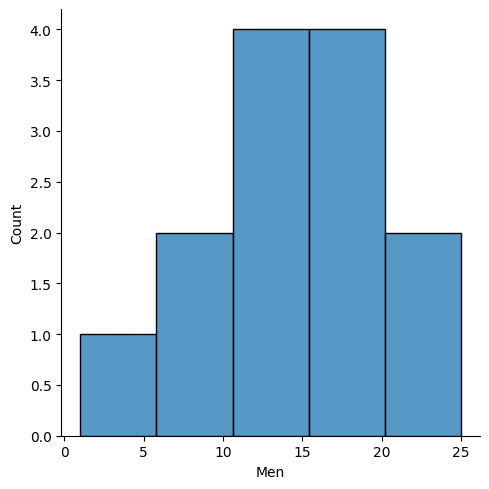

In [21]:
sns.displot(data=df3,x='Men')

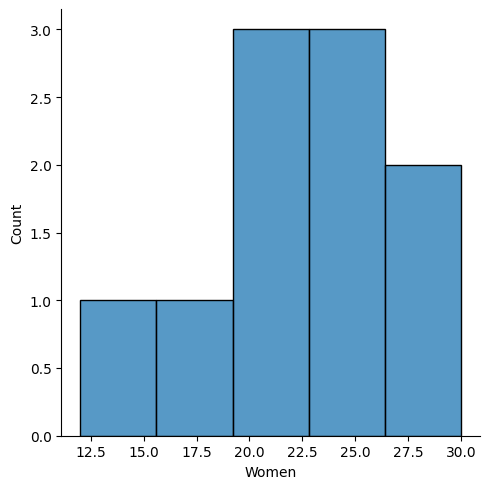

In [22]:
sns.displot(data=df3,x='Women')

In [23]:
U95 = df3.Men.mean() + 1.96 * df3.Men.std()  / np.sqrt(df3.Men.count())
L95 = df3.Men.mean() - 1.96 * df3.Men.std()  / np.sqrt(df3.Men.count())
print(f'Mean           : {df3.Men.mean():0.4f}')
print(f'Standard Dev.  : {df3.Men.std():0.4f}')
print(f'Upper 95% Mean : {U95:0.4f}')
print(f'Lower 95% Mean : {L95:0.4f}')
print(f'N              : {df3.Men.count()}')

Mean           : 14.9462
Standard Dev.  : 6.8426
Upper 95% Mean : 18.6658
Lower 95% Mean : 11.2265
N              : 13


In [24]:
U95 = df3.Women.mean() + 1.96 * df3.Women.std()  / np.sqrt(df3.Women.count())
L95 = df3.Women.mean() - 1.96 * df3.Women.std()  / np.sqrt(df3.Women.count())
print(f'Mean           : {df3.Women.mean():0.4f}')
print(f'Standard Dev.  : {df3.Women.std():0.4f}')
print(f'Upper 95% Mean : {U95:0.4f}')
print(f'Lower 95% Mean : {L95:0.4f}')
print(f'N              : {df3.Women.count()}')

Mean           : 22.2900
Standard Dev.  : 5.3197
Upper 95% Mean : 25.5872
Lower 95% Mean : 18.9928
N              : 10


#### Null Hypothesis
Ho : μ1 = μ2   => Body fat mean is same for both men and woman

#### Alternate Hypothesis
The alternative hypothesis is that the means are not equal. This is written as:

H1 : μ1 ≠ μ2

In [25]:
#We calculate the average for each group, and then calculate the difference between the two averages. This is written as:
m1 = df3.Women.mean()
m2 = df3.Men.mean()
n1 = df3.Women.count()
n2 = df3.Men.count()
s1 = df3.Women.std()
s2 = df3.Men.std()
difference = m1 - m2 
difference

7.343846153846153

In [26]:
s1

5.319659554687478

In [27]:
s2

6.842589103623397

In [28]:
sp = np.sqrt((((n1-1)*s1**2) + ((n2-1)*s2**2)) / (n1+n2-2))
dof = n1 + n2 - 2
print(f'Sp  : {sp}')
print(f'Dof : {dof}')

Sp  : 6.235617003466411
Dof : 21


In [29]:
two_tail_t_test = (m1-m2) / (sp * np.sqrt(1/n1 + 1/n2))
two_tail_t_test

2.7999604428329192

In [30]:
# T- tests : left-tail: alpha
# T- tests : right-tail: 1-alpha
# T- tests : two-tail: 1-alpha/2; we are using two tail test because we are checking the bar value to constant value 20.
critical_value = stats.t.ppf(q=1-alpha/2,df=dof)
print(f'Critical value is  : {critical_value:0.04f}')
if two_tail_t_test > critical_value: 
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

Critical value is  : 2.0796
Reject Null Hypothesis


#### Z-Test

##### One Sample Z-Test

         z-test = meanSample - meanPopu  / (PopulationStd / np.sqrt(n))


##### Two Sample Z-test

         z-test = (difference in mean of samples ) -  (difference in Population Mean)  /  np.sqrt((s1**2 / n1) + (s2**2/n2))
        

In [31]:
#help(norm)

In [32]:
#critical_value = stats.t.ppf(q=1-alpha/2,df=dof)
#print(f'Critical value is  : {critical_value:0.04f}')

In [33]:
# Calculate the p-value for a z-score by computing norm with Survival function
p_value = norm.sf(abs(1.8336))
p_value

0.03335669611796731

In Z-test, Critical Values are fixed.

    
-    Significance Level	Type of Test	Critical Value(s)
- 0.01	Two-Tailed	±2.576
- 0.01	Left Tail	–2.326
- 0.01	Right Tail	+2.326
- 0.05	Two-Tailed	±1.960
- 0.05	Left Tail	+1.650
- 0.05	Right Tail	–1.650

https://statisticsbyjim.com/hypothesis-testing/z-test/

### Annova Test

In [34]:
#### One way Annova Test

https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/

In [35]:
alpha = 0.05

In [36]:
# Performance when each of the engine 
# oil is applied
performance1 = [89, 89, 88, 78, 79]
performance2 = [93, 92, 94, 89, 88]
performance3 = [89, 88, 89, 93, 90]
performance4 = [81, 78, 81, 92, 82]

In [37]:
# Conduct the one-way ANOVA
values = stats.f_oneway(performance1, performance2, performance3, performance4)
print(f'F-Statistic : {values.statistic:0.4f}')
print(f'P-Value     : {values.pvalue:0.4f}')

F-Statistic : 4.6250
P-Value     : 0.0163


The F statistic and p-value turn out to be equal to 4.625 and 0.016336498 respectively. 
Since the p-value is less than 0.05 hence we would reject the null hypothesis.
This implies that we have sufficient proof to say that there exists a difference 
in the performance among four different engine oils. 

In [38]:
#### Two way Annova Test

In [39]:
# Create a dataframe 
df = pd.DataFrame({'Fertilizer': np.repeat(['daily', 'weekly'], 15), 
                          'Watering': np.repeat(['daily', 'weekly'], 15), 
                          'height': [14, 16, 15, 15, 16, 13, 12, 11, 14,  
                                     15, 16, 16, 17, 18, 14, 13, 14, 14,  
                                     14, 15, 16, 16, 17, 18, 14, 13, 14,  
                                     14, 14, 15]})

In [40]:
df.head()

,Fertilizer,Watering,height
0,daily,daily,14
1,daily,daily,16
2,daily,daily,15
3,daily,daily,15
4,daily,daily,16


In [41]:
print(df.to_string())

   Fertilizer Watering  height
0       daily    daily      14
1       daily    daily      16
2       daily    daily      15
3       daily    daily      15
4       daily    daily      16
5       daily    daily      13
6       daily    daily      12
7       daily    daily      11
8       daily    daily      14
9       daily    daily      15
10      daily    daily      16
11      daily    daily      16
12      daily    daily      17
13      daily    daily      18
14      daily    daily      14
15     weekly   weekly      13
16     weekly   weekly      14
17     weekly   weekly      14
18     weekly   weekly      14
19     weekly   weekly      15
20     weekly   weekly      16
21     weekly   weekly      16
22     weekly   weekly      17
23     weekly   weekly      18
24     weekly   weekly      14
25     weekly   weekly      13
26     weekly   weekly      14
27     weekly   weekly      14
28     weekly   weekly      14
29     weekly   weekly      15


In [42]:
# Importing libraries 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
  
# Performing two-way ANOVA 
model = ols('height ~ C(Fertilizer) + C(Watering) + C(Fertilizer):C(Watering)', data=df).fit() 
result = sm.stats.anova_lm(model, type=2) 
  
# Print the result 
print(result) 

                             df     sum_sq   mean_sq         F    PR(>F)
C(Fertilizer)               1.0   0.033333  0.033333  0.012069  0.913305
C(Watering)                 1.0   1.421614  1.421614  0.514722  0.479045
C(Fertilizer):C(Watering)   1.0   0.223698  0.223698  0.080994  0.778049
Residual                   28.0  77.333333  2.761905       NaN       NaN


Interpreting the result:

Following are the p-values for each of the factors in the output:

The fertilizer p-value is equal to 0.913305
The Watering p-value is equal to 0.479045
The Fertilizer * Watering: p-value is equal to 0.778049

The p-value for the interaction effect (0.778049) is greater than 0.05 which depicts 
that there is no significant interaction effect between fertilizer frequency and watering frequency.

if p_value > alpha :
    print("Accept Null Hypothesis")  

inear Model
Y = MX + C
Y = M1X1 + C

2,3,4,5.....Variable f_oneway (studying of independent variables )

Y = M1X1 + M2x2 + M3X3 + ....... MnXn + C  : annova_lm (type=2,3,4,5,...)

In [46]:
#### Chi-Square Test:

https://www.simplilearn.com/tutorials/statistics-tutorial/chi-square-test

Mean = Summation of all values / number of samples
Standard Deviation = Summation (( X - Xbar)^2 / Sqrt(n))
Variance = Square of Standard Deviation (Comparing one variables changes)

Co-variance = Two Variables Changes / Covariance factor

- Covariance indicates the direction of the linear relationship between variables. 
- Correlation measures both the strength and direction of the linear relationship between two variables.

## Correlation Coefficient : 

### Pearson Correlation Coefficient
          Covariance of (X,Y) 
    p  =  -------------------
           STD(X) * STD(Y)

https://www.scribbr.com/statistics/pearson-correlation-coefficient/

In [20]:
# Student's Weight
X = np.array([3.63,3.02,3.82,3.42,3.59,2.87,3.03,3.46,3.36,3.3])

# Student's Length
Y = np.array([53.1,49.7,48.4,54.2,54.9,43.7,47.2,45.2,54.4,50.4])

In [21]:
xmean = X.mean()
ymean = Y.mean()
N = np.size(X)
covariance = np.sum((X-xmean) * (Y-ymean))/ N

In [22]:
p =  covariance / (X.std() * Y.std())
p

0.4701772329684028

### Spearman's Rank Correlation Coefficient
                6 * Summation (d^2) 
    p  =  1 -  -------------------
                 n ( n^2 -1 ) 

https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/spearman-rank-correlation-definition-calculate/

In [37]:
s1 = np.array([ 35, 23, 47, 17, 10, 43, 9, 6, 28])
s2 = np.array([ 30, 33, 45, 23, 8, 49, 12, 4, 31])
df =  pd.DataFrame({'Physics': s1, 'Chemistry': s2})
n = df.shape[0]
df['rank1'] = df.Physics.rank()
df['rank2'] = df.Chemistry.rank()
df['d'] =  np.abs(df.rank1 - df.rank2)
df['d2'] =  df.d ** 2
df.head()

,Physics,Chemistry,rank1,rank2,d,d2
0,35,30,7.0,5.0,2.0,4.0
1,23,33,5.0,7.0,2.0,4.0
2,47,45,9.0,8.0,1.0,1.0
3,17,23,4.0,4.0,0.0,0.0
4,10,8,3.0,2.0,1.0,1.0


In [39]:
p = 1 - 6 * np.sum(df.d2) / (n * (n**2 -1))
p

0.9

### Kendall Tau Correlation Coefficient

                       (C – D)
      Kendall’s Tau =  ------
                       (C + D)

    Where C is concordant Pair and D is discordant Pair

https://www.statisticshowto.com/kendalls-tau/#:~:text=into%20the%20formula%3A-,Kendall's%20Tau%20%3D%20(C%20%E2%80%93%20D%20%2F%20C%20%2B%20D),85.
    


In [57]:
s1 = np.array([i for i in range(1,13,1,) ] )
s2 =  np.array([1,2,3,5,4,7,6,8,10,9,11,12])
c =  np.array([0 for i in range(12)])
d =  np.array([0 for i in range(12)])
s =  np.array([ chr(65+i) for i in range(12)])
df =  pd.DataFrame({'Student' : s, 'Interviewer1': s1, 'Interviewer2': s2, 'Concordant' : c, 'Discordant' : d})
for i in df.index:
    df.loc[i, 'Concordant'] = np.sum(df.Interviewer2.iloc[i] < df.Interviewer2.iloc[i:])
    df.loc[i, 'Discordant'] = np.sum(df.Interviewer2.iloc[i] > df.Interviewer2.iloc[i:])  
df.head(12)

,Student,Interviewer1,Interviewer2,Concordant,Discordant
0,A,1,1,11,0
1,B,2,2,10,0
2,C,3,3,9,0
3,D,4,5,7,1
4,E,5,4,7,0
5,F,6,7,5,1
6,G,7,6,5,0
7,H,8,8,4,0
8,I,9,10,2,1
9,J,10,9,2,0


In [60]:
Tau  = (np.sum(df.Concordant) - np.sum(df.Discordant) ) / (np.sum(df.Concordant) + np.sum(df.Discordant))
Tau

0.9090909090909091